In [115]:
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

In [116]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.

train_labels = mnist.train_labels()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (mnist.train_images() / 255) - 0.5
test_images = (mnist.test_images() / 255) - 0.5

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


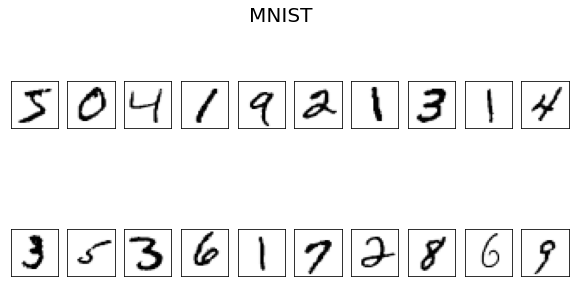

In [117]:
fig, axes = plt.subplots(2, 10, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [118]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [119]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='sigmoid'),
])


In [120]:
optimizer = optimizers.Adam(learning_rate=0.003)

In [121]:
# создание keras модели
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [122]:
def scheduler(epoch, lr):
  if epoch < 3:
    return lr
  else:
    return lr + 0.0001

In [123]:
callbacks = [
  # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
  EarlyStopping(patience=3, monitor='accuracy', min_delta=0.001, restore_best_weights=True),
  # Записать логи TensorBoard в каталог `./logs` directory
  LearningRateScheduler(scheduler)
]

In [124]:
%%time
model.fit(train_images,
          to_categorical(train_labels),
          epochs=11,
          batch_size=64
            ,callbacks=callbacks,
)

Epoch 1/11
938/938 [==============================] - 2s 2ms/step - loss: 0.3025 - accuracy: 0.9072 - lr: 0.0030
Epoch 2/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1526 - accuracy: 0.9539 - lr: 0.0030
Epoch 3/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1308 - accuracy: 0.9591 - lr: 0.0030
Epoch 4/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1113 - accuracy: 0.9653 - lr: 0.0031
Epoch 5/11
938/938 [==============================] - 2s 2ms/step - loss: 0.1070 - accuracy: 0.9670 - lr: 0.0032
Epoch 6/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0956 - accuracy: 0.9702 - lr: 0.0033
Epoch 7/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0960 - accuracy: 0.9701 - lr: 0.0034
Epoch 8/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0903 - accuracy: 0.9718 - lr: 0.0035
Epoch 9/11
938/938 [==============================] - 2s 2ms/step - loss: 0.0867 - accuracy: 0.9

In [125]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 891us/step - loss: 0.1496 - accuracy: 0.9621


[0.1495658904314041, 0.9621000289916992]

In [126]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])
predictions

1/1 [==============================] - 0s 64ms/step


array([[7.6155402e-07, 4.2297535e-02, 7.0468944e-01, 7.0444274e-01,
        8.8709762e-04, 1.3917811e-05, 1.0685789e-08, 1.0000000e+00,
        1.3132982e-05, 1.5321713e-02],
       [3.2475164e-08, 9.4596100e-01, 1.0000000e+00, 5.3605574e-01,
        1.5012110e-09, 5.7177494e-09, 2.0846536e-03, 1.0535236e-01,
        9.7902334e-01, 1.2541969e-08],
       [1.7456119e-05, 9.9998623e-01, 9.8808491e-01, 8.0624865e-03,
        1.3813088e-04, 5.9845345e-04, 1.4439070e-01, 4.8012748e-02,
        4.9804977e-01, 1.0625260e-05],
       [9.9999899e-01, 5.4231322e-08, 2.3376778e-02, 8.4671174e-04,
        1.9491225e-02, 5.5797751e-05, 1.0727660e-01, 9.9943835e-01,
        1.2539764e-04, 8.1113130e-01],
       [2.6216156e-05, 4.3033063e-10, 1.7147992e-03, 1.2386192e-03,
        9.9999994e-01, 4.4450178e-05, 2.5709371e-05, 9.8424792e-01,
        1.1486784e-05, 9.6266603e-01]], dtype=float32)

### Выводы
1. Попробуйте обучить, нейронную сеть на Keras (рассмотренную на уроке) на датасете MNIST с другими параметрами. Напишите в комментарии к уроку:
    - Какого результата вы добились от нейросети?
    - Что помогло вам улучшить её точность?
1. Поработайте с документацией Keras. Попробуйте найти полезные команды Keras, неразобранные на уроке.



Попробовал, увеличить количество нейронов во входном и промежуточном слоях, что дало положительный эффект, так же задал начальную скорость обучения для оптимизатора и увеличил количество эпох.

Из полезных команд нашел для себя callback позволяющие динамически управлять скоростью обучения и процессом остановки.